# HW 6 - Computational exploration of Phase Space

Return as *firstname_lastname-HW6.*
Specify your collaborators.


### Question 1 -  Categorizing the Phase Plane
Pick 2X2 real-valued matrices that satisfy the following 4 conditions.
* Det < 0
* Det > 0 & Trace > 0 & Real lambdas
* Det > 0 & Trace > 0 & Complex lambdas
* Det > 0 & Trace < 0 & Real lambdas
* Det > 0 & Trace < 0 & Complex lambdas
* Det > 0 & Trace = 0 & Imaginary lambdas

Plot the 2D phase portrait and eigenvectors (if they are real). Specify whether the fixed points are stable or unstable.

### For a general 2x2 matrix:
$\begin{bmatrix} A \end{bmatrix} = \begin{bmatrix} a & b \\ c & d \end{bmatrix}$

* The determinant is (ad - bc)
* The trace is the sum of the diagonal elements (a+d)

For A1:
  The determinant is -6.0
  The trace is 1
  The discriminant is 25.0
  The evals of the matrix are [ 3. -2.]
  The evecs of the matrix are [[ 0.70710678 -0.24253563]
 [ 0.70710678  0.9701425 ]]
  Stability: unstable
For A2:
  The determinant is 7.000000000000001
  The trace is 6
  The discriminant is 7.9999999999999964
  The evals of the matrix are [4.41421356 1.58578644]
  The evecs of the matrix are [[ 0.57735027 -0.57735027]
 [ 0.81649658  0.81649658]]
  Stability: unstable
For A3:
  The determinant is 17.0
  The trace is 2
  The discriminant is -64.0
  The evals of the matrix are [1.+4.j 1.-4.j]
  The evecs of the matrix are [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]
  Stability: unstable
For A4:
  The determinant is 7.000000000000001
  The trace is -6
  The discriminant is 7.9999999999999964
  The evals of the matrix are [-1.58578644 -4.41421356]
  The evecs of the matrix are [[ 0.92387953 -0.38268343]
 [ 0.38268343 

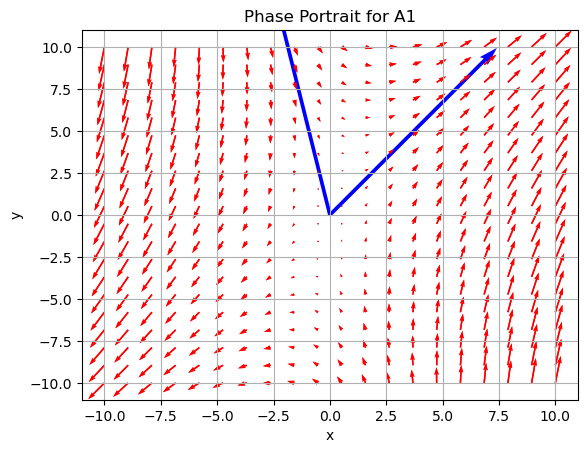

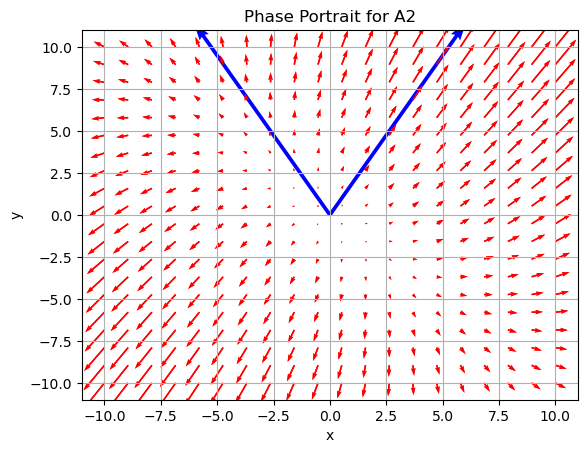

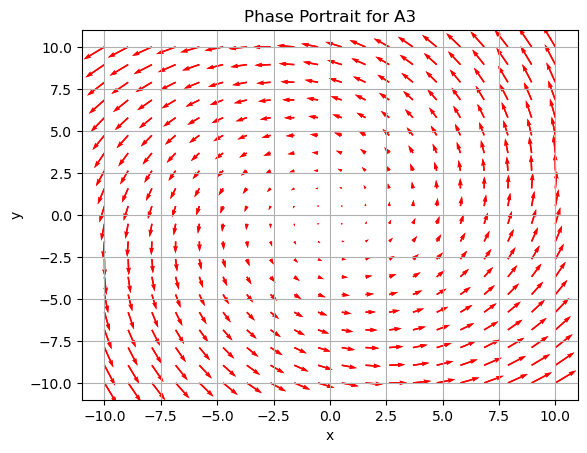

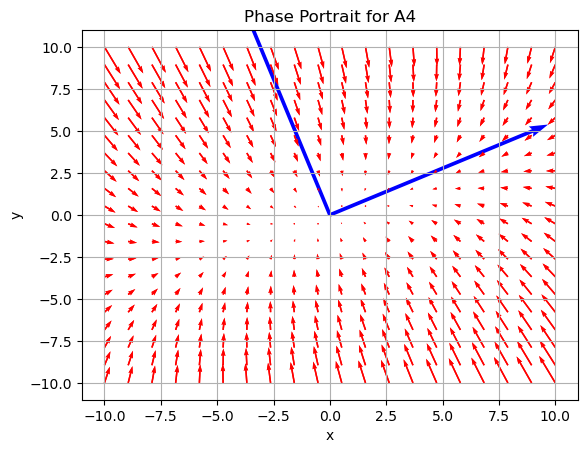

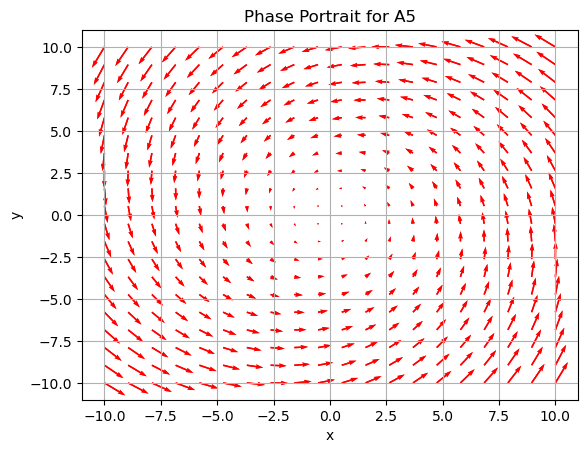

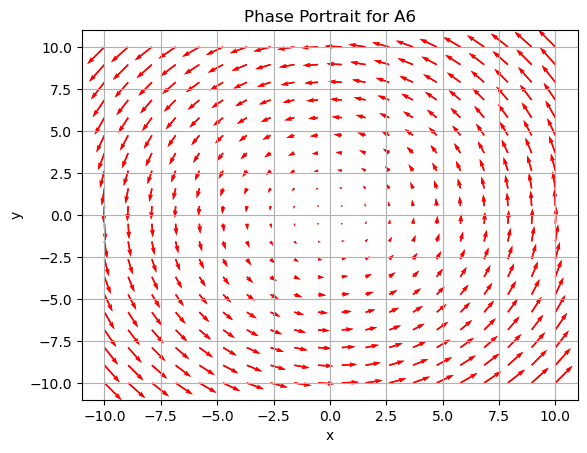

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Define matrices
matrices = {
    'A1': np.array([[2, 1], [4, -1]]),
    'A2': np.array([[3, 1], [2, 3]]),
    'A3': np.array([[1, -4], [4, 1]]),
    'A4': np.array([[-2, 1], [1, -4]]),
    'A5': np.array([[-1, -4], [4, -1]]),
    'A6': np.array([[0, -1], [1, 0]])
}
        

    
# Function to determine stability of each matrix with their respective conditions
def check_evals(matrix):
    evals, _ = np.linalg.eig(matrix)
    
    # Check signs of eigenvalues
    positive = np.any(evals > 0)
    negative = np.any(evals < 0)
    
    # Determine the nature of the eigenvalues
    if positive and negative:
        return 'unstable'
    elif positive:
        return 'unstable'
    elif negative:
        return 'stable'
    else:
        return 'neutrally stable'
        
# Loop through each matrix and calculate determinants, traces, and discriminants
for name, matrix in matrices.items():
    det = np.linalg.det(matrix)
    trace = np.trace(matrix)
    discriminant = (trace ** 2) - 4 * det  # Gives insight into real, complex, or imaginary evals
    evals, evecs = np.linalg.eig(matrix)
    result = check_evals(matrix)
    stability = check_evals(matrix)

        
    print(f'For {name}:')
    print(f'  The determinant is {det}')
    print(f'  The trace is {trace}')
    print(f'  The discriminant is {discriminant}')
    print(f'  The evals of the matrix are {evals}')
    print(f'  The evecs of the matrix are {evecs}')
    print(f'  Stability: {stability}')
    
# Define a function to plot phase portraits
def plot_phase_portrait(A, title):
    #x, y are the state variables of the system that are influeced by the components of the matrix 'A'
    x, y = np.meshgrid(np.linspace(-10, 10, 20), np.linspace(-10, 10, 20))# Can combine np.meshgrid/np.linspace into one variable
    #u and v describe dx/dt and dy/dt respectively giving insight to both magnitude and direction of each vector they represent
    u = A[0, 0] * x + A[0, 1] * y
    v = A[1, 0] * x + A[1, 1] * y
    
    plt.quiver(x, y, u, v, color='r')
    
    # Calculate eigenvalues and eigenvectors
    evals, evecs = np.linalg.eig(A)
    
    # Origin point for eigenvectors
    origin = [0], [0]  # origin point
    
    # Plotting eigenvectors if they are real
    for i in range(len(evals)):
        if np.isreal(evals[i]):
            # Scale eigenvectors for visualization
            vec = evecs[:, i] * 10  # Scale for better visualization
            plt.quiver(*origin, vec[0], vec[1], color=['b', 'g'], scale=21)
    

    plt.quiver(x, y, u, v, color='r')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.grid(True)
    plt.show()

#Can use a for loop to plot each condition without having to put in each matrix condition as a parameter for the function individually
for name, A in matrices.items():
    plot_phase_portrait(A, f'Phase Portrait for {name}')

## Question 2 - Multiple Equillibria in 2D

Consider a model where Sharks eat Tuna causing Tuna populations to diminish and Shark populations to increase. 

$$\dot{S} = 0.01ST - 0.2S$$
$$\dot{T} = 0.05T - 0.01ST$$

Plot this phase plane.
How many equilibrium points are there, what are their coordinates?
What is each one's biological significance?



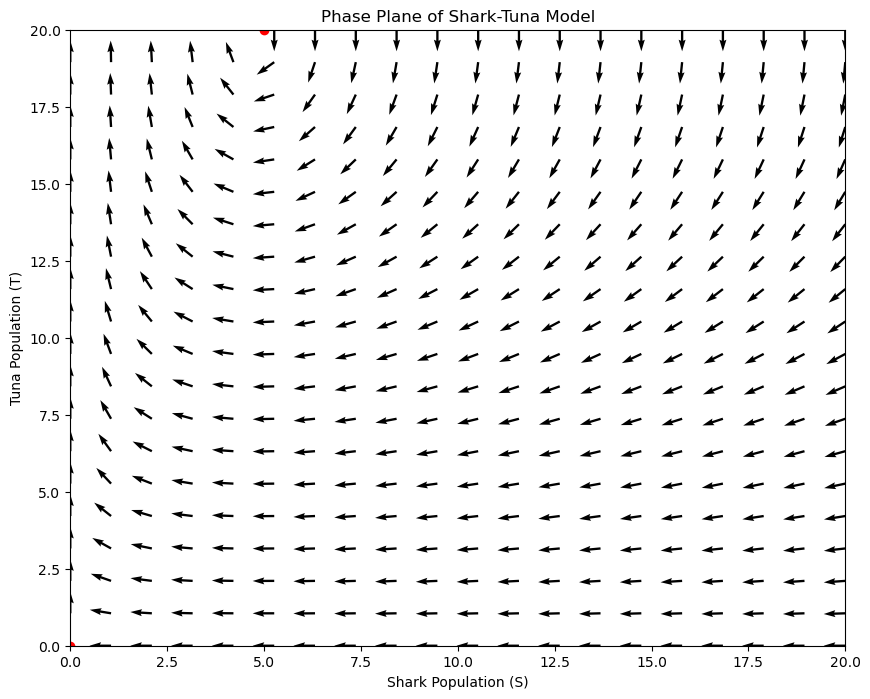

Equilibrium point coordinates are (array([-5.e-324, -4.e-323]), array([ 5., 20.]))


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# System of differential equations
def system(ST, t=0):
    S, T = ST
    dSdt = 0.01*S*T - 0.2*S
    dTdt = 0.05*T - 0.01*S*T
    return [dSdt, dTdt]

# Create a grid and compute direction at each point directly
X, Y = np.meshgrid(np.linspace(0, 20, 20), np.linspace(0, 20, 20))
U, V = np.zeros(X.shape), np.zeros(Y.shape)

for i in range(X.shape[0]):
    for j in range(Y.shape[1]):
        ST_deriv = system([X[i, j], Y[i, j]])
        U[i, j] = ST_deriv[0]
        V[i, j] = ST_deriv[1]

# Normalize arrows (makes the magnitude of all vectors the same
N = np.sqrt(U**2 + V**2)
N[N == 0] = 1.0
U /= N
V /= N

# Plot phase plane
plt.figure(figsize=(10, 8))
plt.quiver(X, Y, U, V, angles="xy")
plt.xlabel('Shark Population (S)')
plt.ylabel('Tuna Population (T)')
plt.xlim([0, 20])
plt.ylim([0, 20])
plt.title('Phase Plane of Shark-Tuna Model')

# Equilibrium points
# Solving for dS/dt = 0 and dT/dt = 0
def equations(vars):
    S, T = vars
    eq1 = 0.01*S*T - 0.2*S
    eq2 = 0.05*T - 0.01*S*T
    return [eq1, eq2]

# Initial guess for equilibrium points within the phase plane
guess1 = [1, 1]
guess2 = [20, 20]

# Solve for equilibrium points
eq_point1 = fsolve(equations, guess1)
eq_point2 = fsolve(equations, guess2)

plt.plot(eq_point1[0], eq_point1[1], 'ro')  # Equilibrium point 1
plt.plot(eq_point2[0], eq_point2[1], 'ro')  # Equilibrium point 2 (if it exists and is different)

# Show plot with equilibrium points
plt.show()

print(f'Equilibrium point coordinates are {eq_point1, eq_point2}')


* The biological significance of the equilibrium point (5,20) shows the point where the two species are able to coexist. This means that 20 tuna are able to support 5 sharks (steady state) without leading to changes overtime in either population.

* There is not any biological significance of the equilibrium point ~(0,0) because this just describes no rate of change in population size for either sharks or tuna when there is 0 of each

## Extra Credit - 3D Phase Fields

Plot the 3D phase field of the equation from -2:2 in all dimensions

$$\dot{x} = -z$$
$$\dot{y} = -x$$
$$\dot{z} = y$$

Plot 10 trajectories through the phase field. 

Consider the following block of code as an example of how to plot 3D vector fields. 


Populating the interactive namespace from numpy and matplotlib


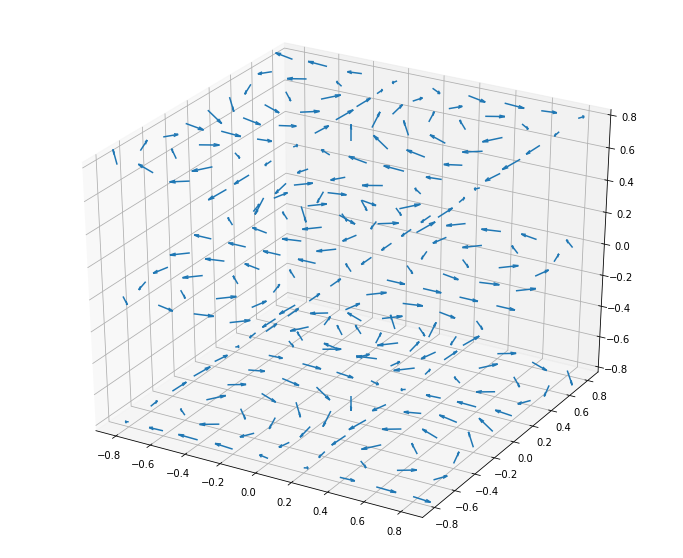

In [9]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12.0,10.0)
from mpl_toolkits.mplot3d import Axes3D 

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

# Make the direction data for the arrows
u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True) #They upgraded a normalize argument into quiver so no more normalization needed

plt.show()

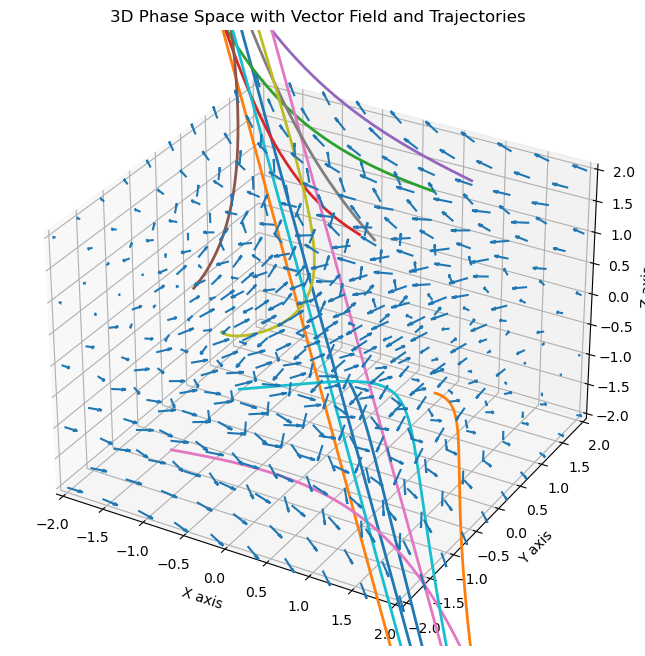

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

# Time points for integration
t = np.linspace(0, 20, 1000) 

# Creating the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define the grid for the phase field
x, y, z = np.meshgrid(np.linspace(-2, 2, 10),
                      np.linspace(-2, 2, 10),
                      np.linspace(-2, 2, 5))

# Calculate the vector components of the phase field
u = -z
v = -x
w = y

# Plotting the vector field
ax.quiver(x, y, z, u, v, w, length=0.2, normalize=True)

# Define the system of ODEs
def system(conditions, t=0):
    x, y, z = conditions
    return [-z, -x, y]

# Generate and plot 10 trajectories
for _ in range(10):
    # Initial condition within the phase plane for x, y, z
    initial_condition = np.random.uniform(-2, 2, 3)
    
    # Integrate the system of equations
    trajectory = odeint(system, initial_condition, t)
    
    # Plot the trajectory
    ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], linewidth=2)

# Setting the labels and limits for the phase plane
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Phase Space with Vector Field and Trajectories')

plt.show()

* Worked with Olga Barbashova